# DATASETS (more or less ito gagamitin)
1. geoportal_doh_poi_health.csv - DOH health facilities from the GeoPortal platform
2. osm_poi_health.csv - OpenStreetMap (OSM) health facilities available for each barangay
3. mapbox_health_facility_brgy_isochrones.csv - % accessible barangay population within a 5-30 minutes travel time from nearest health facility based on the Mapbox Isochrones API
4. worldpop_population.csv - gridded barangay population estimates from WorldPop
5. disease_lgu_disaggregated_totals.csv - baranggay-level age and sex-disaggregated disease deaths (mortality) and cases (morbidity) from reports submitted by the LGU to DOH-Field Health Services Information System (DOH-FHSIS) or Department of Health- Philippine Integrated Disease Surveillance and Response (DOH-PISDR)

link: https://data.humdata.org/dataset/project-cchain

6. Barangays.shp - administrative boundaries in the Philippines at the barangay level

link: https://github.com/altcoder/philippines-psgc-shapefiles/blob/main/data/2015/Barangays.zip

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting Global File Path

## define global file path
file_path = "C://Users//riane//Downloads//02_GitHub//econ138-capstone"
### Riane - "C://Users//riane//Downloads//02_GitHub//econ138-capstone"
### Blaine - ""
### Carlos - ""

## define a global data path
data_path = file_path + "//01_Datasets"

In [3]:
# Loading Datasets

## DOH health facilities
brgy_hfacilities_doh = pd.read_csv(data_path + "//geoportal_doh_poi_health.csv")

## OSM health facilities
brgy_hfacilities_osm = pd.read_csv(data_path + "//osm_poi_health.csv")

## population density in barangays
population_density = pd.read_excel(data_path + "//Density_Table_201010152020.xlsx", header=2)

## mortality + morbidity in baranagays
mortality_morbidity = pd.read_csv(data_path + "//disease_lgu_disaggregated_totals.csv")

## barangay administrative boundaries
ph_brgy_shp = gpd.read_file(data_path + "//Barangays//Barangays.shp")

## INSPECT DATA

### Health Facilities (DOH)

In [4]:
# Inspecting brgy_hfacilities_doh data

## Check for shape
brgy_hfacilities_doh.shape

(879, 21)

In [5]:
# Inspecting brgy_hfacilities_doh data

## Check info
brgy_hfacilities_doh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 21 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   uuid                                                    879 non-null    object 
 1   adm4_pcode                                              879 non-null    object 
 2   date                                                    879 non-null    object 
 3   freq                                                    879 non-null    object 
 4   doh_pois_count                                          879 non-null    float64
 5   doh_brgy_health_station_count                           879 non-null    float64
 6   doh_brgy_health_station_nearest                         879 non-null    float64
 7   doh_rural_health_unit_count                             879 non-null    float64
 8   doh_rural_health_unit_nearest           

In [6]:
# Inspecting brgy_hfacilities_doh data

## Check for head
brgy_hfacilities_doh.head()

,uuid,adm4_pcode,date,freq,doh_pois_count,doh_brgy_health_station_count,doh_brgy_health_station_nearest,doh_rural_health_unit_count,doh_rural_health_unit_nearest,doh_hospital_count,...,doh_birthing_home_lying_in_clinic_count,doh_birthing_home_lying_in_clinic_nearest,doh_infirmary_count,doh_infirmary_nearest,doh_drug_abuse_treatment_rehabilitation_center_count,doh_drug_abuse_treatment_rehabilitation_center_nearest,doh_social_hygiene_clinic_count,doh_social_hygiene_clinic_nearest,doh_medical_clinic_count,doh_medical_clinic_nearest
0,GPDPH000000,PH015518016,2013-01-01,S,0.0,0.0,57.207979,0.0,2223.053002,0.0,...,0.0,1374.683230,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.0
1,GPDPH000001,PH015518031,2013-01-01,S,3.0,0.0,315.326271,0.0,956.852487,3.0,...,0.0,360.111127,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.0
2,GPDPH000002,PH015518022,2013-01-01,S,4.0,1.0,0.000000,0.0,525.943025,2.0,...,1.0,0.000000,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.0
3,GPDPH000003,PH015518024,2013-01-01,S,0.0,0.0,26.057052,0.0,470.836570,0.0,...,0.0,1234.886976,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.0
4,GPDPH000004,PH034919017,2013-01-01,S,0.0,0.0,1461.018896,0.0,1184.233554,0.0,...,0.0,10000.000000,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.0


In [7]:
# Dropping columns (uuid, date, freq)
brgy_hfacilities_doh = brgy_hfacilities_doh.drop(columns = ['date', 'freq', 'uuid'])

## Preview dataset
brgy_hfacilities_doh

,adm4_pcode,doh_pois_count,doh_brgy_health_station_count,doh_brgy_health_station_nearest,doh_rural_health_unit_count,doh_rural_health_unit_nearest,doh_hospital_count,doh_hospital_nearest,doh_birthing_home_lying_in_clinic_count,doh_birthing_home_lying_in_clinic_nearest,doh_infirmary_count,doh_infirmary_nearest,doh_drug_abuse_treatment_rehabilitation_center_count,doh_drug_abuse_treatment_rehabilitation_center_nearest,doh_social_hygiene_clinic_count,doh_social_hygiene_clinic_nearest,doh_medical_clinic_count,doh_medical_clinic_nearest
0,PH015518016,0.0,0.0,57.207979,0.0,2223.053002,0.0,1284.283872,0.0,1374.683230,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.000000
1,PH015518031,3.0,0.0,315.326271,0.0,956.852487,3.0,0.000000,0.0,360.111127,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.000000
2,PH015518022,4.0,1.0,0.000000,0.0,525.943025,2.0,0.000000,1.0,0.000000,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.000000
3,PH015518024,0.0,0.0,26.057052,0.0,470.836570,0.0,61.589973,0.0,1234.886976,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.000000
4,PH034919017,0.0,0.0,1461.018896,0.0,1184.233554,0.0,10000.000000,0.0,10000.000000,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,PH137401018,1.0,0.0,403.548006,1.0,0.000000,0.0,362.521353,0.0,9812.208969,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,888.672382
875,PH137401022,7.0,1.0,0.000000,2.0,0.000000,3.0,0.000000,0.0,10000.000000,0.0,10000.0,0.0,10000.0,0.0,10000.0,1.0,0.000000
876,PH137503007,0.0,0.0,1439.449103,0.0,21.304852,0.0,560.834949,0.0,888.359157,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.000000
877,PH137503014,2.0,0.0,3531.672618,1.0,0.000000,0.0,1390.279229,1.0,0.000000,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.000000


### Health Facilities (OSM)

In [8]:
# Inspecting brgy_hfacilities_osm data

## Check for shape
brgy_hfacilities_osm.shape

(7911, 16)

In [9]:
# Inspecting brgy_hfacilities_osm data

## Check info
brgy_hfacilities_osm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7911 entries, 0 to 7910
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uuid              7911 non-null   object 
 1   adm4_pcode        7911 non-null   object 
 2   date              7911 non-null   object 
 3   freq              7911 non-null   object 
 4   clinic_count      7911 non-null   float64
 5   clinic_nearest    7911 non-null   float64
 6   dentist_count     7911 non-null   float64
 7   dentist_nearest   7911 non-null   float64
 8   doctors_count     7911 non-null   float64
 9   doctors_nearest   7911 non-null   float64
 10  hospital_count    7911 non-null   float64
 11  hospital_nearest  7911 non-null   float64
 12  optician_count    7911 non-null   float64
 13  optician_nearest  7911 non-null   float64
 14  pharmacy_count    7911 non-null   float64
 15  pharmacy_nearest  7911 non-null   float64
dtypes: float64(12), object(4)
memory usage: 98

In [10]:
# Inspecting brgy_hfacilities_osm data

## Check for head
brgy_hfacilities_osm.head()

,uuid,adm4_pcode,date,freq,clinic_count,clinic_nearest,dentist_count,dentist_nearest,doctors_count,doctors_nearest,hospital_count,hospital_nearest,optician_count,optician_nearest,pharmacy_count,pharmacy_nearest
0,OSMPH000000,PH015518016,2018-01-01,Y,0.0,10000.0,0.0,1769.374267,0.0,10000.0,0.0,1287.610535,0.0,1641.869235,0.0,1041.414528
1,OSMPH000001,PH015518031,2018-01-01,Y,0.0,10000.0,1.0,0.000000,0.0,10000.0,2.0,0.000000,0.0,119.946141,5.0,0.000000
2,OSMPH000002,PH015518022,2018-01-01,Y,0.0,10000.0,0.0,16.499396,0.0,10000.0,0.0,18.137222,0.0,485.692845,15.0,0.000000
3,OSMPH000003,PH015518024,2018-01-01,Y,0.0,10000.0,0.0,242.770779,0.0,10000.0,0.0,317.053145,0.0,222.414184,4.0,0.000000
4,OSMPH000004,PH034919017,2018-01-01,Y,0.0,10000.0,0.0,10000.000000,0.0,10000.0,0.0,10000.000000,0.0,10000.000000,0.0,10000.000000


In [11]:
# Dropping columns (uuid, date, freq, optician_count, optician_nearest)
brgy_hfacilities_osm = brgy_hfacilities_osm.drop(columns = ['date', 'freq', 'uuid', 'optician_count', 'optician_nearest'])

## Preview dataset
brgy_hfacilities_osm

,adm4_pcode,clinic_count,clinic_nearest,dentist_count,dentist_nearest,doctors_count,doctors_nearest,hospital_count,hospital_nearest,pharmacy_count,pharmacy_nearest
0,PH015518016,0.0,10000.0,0.0,1769.374267,0.0,10000.000000,0.0,1287.610535,0.0,1041.414528
1,PH015518031,0.0,10000.0,1.0,0.000000,0.0,10000.000000,2.0,0.000000,5.0,0.000000
2,PH015518022,0.0,10000.0,0.0,16.499396,0.0,10000.000000,0.0,18.137222,15.0,0.000000
3,PH015518024,0.0,10000.0,0.0,242.770779,0.0,10000.000000,0.0,317.053145,4.0,0.000000
4,PH034919017,0.0,10000.0,0.0,10000.000000,0.0,10000.000000,0.0,10000.000000,0.0,10000.000000
...,...,...,...,...,...,...,...,...,...,...,...
7906,PH137401018,0.0,10000.0,0.0,411.027351,0.0,134.783556,0.0,1041.680623,0.0,289.248776
7907,PH137401022,0.0,10000.0,0.0,237.275571,0.0,209.112357,1.0,0.000000,5.0,0.000000
7908,PH137503007,0.0,10000.0,0.0,10000.000000,0.0,10000.000000,0.0,542.511244,0.0,794.129508
7909,PH137503014,0.0,10000.0,0.0,10000.000000,0.0,10000.000000,0.0,1398.114245,0.0,418.911431


### Population Density

In [12]:
# Inspecting population_density data

## Check info
population_density = population_density.iloc[:-15]

In [13]:
# Inspecting population_density data

## Check for head
population_density.head()

,city_municipality,pop_2010,pop_2015,pop_2020,land_area,pop_density_2010,pop_density_2015,pop_density_2020,pchange_2010_2015,pchange_2010_2020,pchange_2015_2020
0,PHILIPPINES,92335113.0,100979303.0,109033245.0,300000,307.783710,336.597677,363.444150,9.361758,18.084271,7.975834
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,National Capital Region (NCR),11855975.0,12877253.0,13484462.0,619.54,19136.738548,20785.184169,21765.280692,8.614036,13.735581,4.715361
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,City of Manila *,1652171.0,1780148.0,1846513.0,24.98,66139.751801,71262.930344,73919.655725,7.745990,11.762826,3.728061


In [14]:
# Cleaning dataset

## drop rows with missing values
population_density = population_density.dropna(subset=['city_municipality', 'pop_density_2020'])

## remove * in 1st row 
population_density['city_municipality'] = population_density['city_municipality'].replace(r"\*{1,3}", "", regex=True)

## keep only 2 columns
population_density = population_density[['city_municipality', 'pop_density_2020']]

In [15]:
population_density.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1733 entries, 0 to 1851
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city_municipality  1733 non-null   object 
 1   pop_density_2020   1733 non-null   float64
dtypes: float64(1), object(1)
memory usage: 40.6+ KB


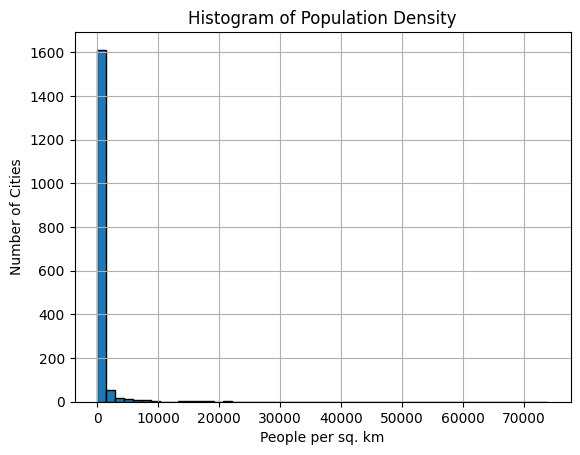

In [16]:
# Plotting Popu Density mean 
plt.hist(population_density['pop_density_2020'], bins=50, edgecolor='black', color='#1f77b4')
plt.title('Histogram of Population Density')
plt.xlabel('People per sq. km')
plt.ylabel('Number of Cities')
plt.grid(True)
plt.show()

### Administrative Boundaries Shapefile

In [17]:
# Inspecting ph_brgy_shp data

## Check info
ph_brgy_shp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 42058 entries, 0 to 42057
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ADM1_PCODE  42058 non-null  object  
 1   ADM1_EN     42058 non-null  object  
 2   ADM2_PCODE  42058 non-null  object  
 3   ADM2_EN     42058 non-null  object  
 4   ADM3_PCODE  42058 non-null  object  
 5   ADM3_EN     42058 non-null  object  
 6   ADM4_PCODE  42036 non-null  object  
 7   ADM4_EN     42058 non-null  object  
 8   geometry    42058 non-null  geometry
dtypes: geometry(1), object(8)
memory usage: 2.9+ MB


In [18]:
# Inspecting ph_brgy_shp data

## Check for head
ph_brgy_shp.head()

,ADM1_PCODE,ADM1_EN,ADM2_PCODE,ADM2_EN,ADM3_PCODE,ADM3_EN,ADM4_PCODE,ADM4_EN,geometry
0,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502012,Pogomboa,"POLYGON ((120.25441 15.88112, 120.24723 15.878..."
1,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502013,Pogonsili,"POLYGON ((120.26372 15.81724, 120.25821 15.811..."
2,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502014,San Jose,"POLYGON ((120.28018 15.87048, 120.27885 15.870..."
3,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502016,Tampac,"POLYGON ((120.26163 15.876, 120.26149 15.87597..."
4,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502017,Laoag,"POLYGON ((120.221 15.88999, 120.22163 15.88672..."


# GEOSPATIAL MAPPING
Use graduated symbols to map health facilities count by type. Each type is differentiated by color while the count is represented by the symbol size.

## Prepare the Geospatial Map

In [19]:
# Filtering columns w/ "_count" + adm4_pcode

## DOH
doh_count = brgy_hfacilities_doh.filter(like='_count')
doh_count.insert(0, 'adm4_pcode', brgy_hfacilities_doh['adm4_pcode'])

## OSM
osm_count = brgy_hfacilities_osm.filter(like='_count')
osm_count.insert(0, 'adm4_pcode', brgy_hfacilities_osm['adm4_pcode'])

In [20]:
## View datasets
doh_count

,adm4_pcode,doh_pois_count,doh_brgy_health_station_count,doh_rural_health_unit_count,doh_hospital_count,doh_birthing_home_lying_in_clinic_count,doh_infirmary_count,doh_drug_abuse_treatment_rehabilitation_center_count,doh_social_hygiene_clinic_count,doh_medical_clinic_count
0,PH015518016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,PH015518031,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
2,PH015518022,4.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0
3,PH015518024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,PH034919017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
874,PH137401018,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
875,PH137401022,7.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,1.0
876,PH137503007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
877,PH137503014,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [21]:
## View datasets
osm_count

,adm4_pcode,clinic_count,dentist_count,doctors_count,hospital_count,pharmacy_count
0,PH015518016,0.0,0.0,0.0,0.0,0.0
1,PH015518031,0.0,1.0,0.0,2.0,5.0
2,PH015518022,0.0,0.0,0.0,0.0,15.0
3,PH015518024,0.0,0.0,0.0,0.0,4.0
4,PH034919017,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
7906,PH137401018,0.0,0.0,0.0,0.0,0.0
7907,PH137401022,0.0,0.0,0.0,1.0,5.0
7908,PH137503007,0.0,0.0,0.0,0.0,0.0
7909,PH137503014,0.0,0.0,0.0,0.0,0.0


In [22]:
# Merging DOH data to OSM

##  Keep all brgy from OSM and bring in DOH data where available
merged_count = pd.merge(osm_count, doh_count, on='adm4_pcode', how='left')

In [23]:
merged_count.describe()

,clinic_count,dentist_count,doctors_count,hospital_count,pharmacy_count,doh_pois_count,doh_brgy_health_station_count,doh_rural_health_unit_count,doh_hospital_count,doh_birthing_home_lying_in_clinic_count,doh_infirmary_count,doh_drug_abuse_treatment_rehabilitation_center_count,doh_social_hygiene_clinic_count,doh_medical_clinic_count
count,7911.000000,7911.000000,7911.000000,7911.000000,7911.000000,7911.000000,7911.000000,7911.000000,7911.000000,7911.000000,7911.000000,7911.000000,7911.000000,7911.000000
mean,0.001770,0.047655,0.060549,0.139047,0.432689,0.827076,0.474403,0.135381,0.125142,0.077361,0.004551,0.001138,0.003413,0.005688
std,0.042033,0.280652,0.299177,0.938639,1.263006,1.035125,0.565615,0.411590,0.450328,0.321315,0.067309,0.033712,0.058325,0.089063
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,4.000000,5.000000,32.000000,16.000000,8.000000,3.000000,4.000000,5.000000,4.000000,1.000000,1.000000,1.000000,2.000000


In [24]:
# Merging counts w/ shp

ph_brgy_shp['ADM4_PCODE'] = ph_brgy_shp['ADM4_PCODE'].str.strip().str.upper()
merged_count['adm4_pcode'] = merged_count['adm4_pcode'].str.strip().str.upper()

map_count = ph_brgy_shp.merge(merged_count, how='left', left_on='ADM4_PCODE', right_on='adm4_pcode') 

## Add popu density
## Preview
map_count

,ADM1_PCODE,ADM1_EN,ADM2_PCODE,ADM2_EN,ADM3_PCODE,ADM3_EN,ADM4_PCODE,ADM4_EN,geometry,adm4_pcode,...,pharmacy_count,doh_pois_count,doh_brgy_health_station_count,doh_rural_health_unit_count,doh_hospital_count,doh_birthing_home_lying_in_clinic_count,doh_infirmary_count,doh_drug_abuse_treatment_rehabilitation_center_count,doh_social_hygiene_clinic_count,doh_medical_clinic_count
0,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502012,Pogomboa,"POLYGON ((120.25441 15.88112, 120.24723 15.878...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502013,Pogonsili,"POLYGON ((120.26372 15.81724, 120.25821 15.811...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502014,San Jose,"POLYGON ((120.28018 15.87048, 120.27885 15.870...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502016,Tampac,"POLYGON ((120.26163 15.876, 120.26149 15.87597...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502017,Laoag,"POLYGON ((120.221 15.88999, 120.22163 15.88672...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49053,PH180000000,NEGROS ISLAND REGION (NIR),PH184500000,NEGROS OCCIDENTAL,PH184528000,CITY OF TALISAY,PH184528030,San Fernando,"POLYGON ((123.06 10.72726, 123.06032 10.72714,...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49054,PH180000000,NEGROS ISLAND REGION (NIR),PH184500000,NEGROS OCCIDENTAL,PH184529000,TOBOSO,PH184529003,General Luna,"MULTIPOLYGON (((123.50895 10.70833, 123.5092 1...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49055,PH180000000,NEGROS ISLAND REGION (NIR),PH184500000,NEGROS OCCIDENTAL,PH184529000,TOBOSO,PH184529005,Poblacion,"MULTIPOLYGON (((123.51869 10.72663, 123.51888 ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49056,PH180000000,NEGROS ISLAND REGION (NIR),PH184500000,NEGROS OCCIDENTAL,PH184530000,VALLADOLID,PH184530013,Palaka,"POLYGON ((122.83312 10.48849, 122.83402 10.488...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Replacing NaN w/ 0
map_count.fillna(0, inplace=True)

## Preview
map_count

,ADM1_PCODE,ADM1_EN,ADM2_PCODE,ADM2_EN,ADM3_PCODE,ADM3_EN,ADM4_PCODE,ADM4_EN,geometry,adm4_pcode,...,pharmacy_count,doh_pois_count,doh_brgy_health_station_count,doh_rural_health_unit_count,doh_hospital_count,doh_birthing_home_lying_in_clinic_count,doh_infirmary_count,doh_drug_abuse_treatment_rehabilitation_center_count,doh_social_hygiene_clinic_count,doh_medical_clinic_count
0,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502012,Pogomboa,"POLYGON ((120.25441 15.88112, 120.24723 15.878...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502013,Pogonsili,"POLYGON ((120.26372 15.81724, 120.25821 15.811...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502014,San Jose,"POLYGON ((120.28018 15.87048, 120.27885 15.870...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502016,Tampac,"POLYGON ((120.26163 15.876, 120.26149 15.87597...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502017,Laoag,"POLYGON ((120.221 15.88999, 120.22163 15.88672...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49053,PH180000000,NEGROS ISLAND REGION (NIR),PH184500000,NEGROS OCCIDENTAL,PH184528000,CITY OF TALISAY,PH184528030,San Fernando,"POLYGON ((123.06 10.72726, 123.06032 10.72714,...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49054,PH180000000,NEGROS ISLAND REGION (NIR),PH184500000,NEGROS OCCIDENTAL,PH184529000,TOBOSO,PH184529003,General Luna,"MULTIPOLYGON (((123.50895 10.70833, 123.5092 1...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49055,PH180000000,NEGROS ISLAND REGION (NIR),PH184500000,NEGROS OCCIDENTAL,PH184529000,TOBOSO,PH184529005,Poblacion,"MULTIPOLYGON (((123.51869 10.72663, 123.51888 ...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49056,PH180000000,NEGROS ISLAND REGION (NIR),PH184500000,NEGROS OCCIDENTAL,PH184530000,VALLADOLID,PH184530013,Palaka,"POLYGON ((122.83312 10.48849, 122.83402 10.488...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Lookup table for city/municipality names and their ADM3 codes
adm3_lookup = map_count[['ADM3_PCODE', 'ADM3_EN']].drop_duplicates()
adm3_lookup['ADM3_EN'] = adm3_lookup['ADM3_EN'].str.strip().str.upper()

## Preview
adm3_lookup

,ADM3_PCODE,ADM3_EN
0,PH015502000,AGUILAR
7,PH015503000,CITY OF ALAMINOS
15,PH015519000,DASOL
24,PH015520000,INFANTA
31,PH012903000,BANTAY
...,...,...
48935,PH184523000,SAGAY CITY
48959,PH184526000,SILAY CITY
48974,PH184528000,CITY OF TALISAY
48998,PH184529000,TOBOSO


In [27]:
# Compare city names with adm3_en  

## Use uppercase
population_density['city_municipality'] = population_density['city_municipality'].str.strip().str.upper()

## Change names to match
replacements = {
    'CITY OF SILAY': 'SILAY CITY',
    'CITY OF DAGUPAN': 'DAGUPAN CITY',
    'GREGORIO DEL PILAR': 'GREGORIO DEL PILAR (CONCEPCION)',
    'CITY OF DUMAGUETE (CAPITAL)': 'DUMAGUETE CITY (CAPITAL)',
    'CITY OF CANLAON': 'CANLAON CITY',
    'BINDOY': 'BINDOY (PAYABON)',
    'CITY OF BAYAWAN': 'CITY OF BAYAWAN (TULONG)',
    'CITY OF BAIS': 'BAIS CITY',
    'AMLAN': 'AMLAN (AYUQUITAN)',
    'CITY OF CADIZ': 'CADIZ CITY',
    'MOISES PADILLA':'MOISES PADILLA (MAGALLON)',
    'CITY OF LA CARLOTA': 'LA CARLOTA CITY',
    'HINOBA-AN': 'HINOBA-AN (ASIA)',
    'CITY OF BAGO': 'BAGO CITY',
    'CITY OF BACOLOD (CAPITAL)': 'BACOLOD CITY (CAPITAL)',
    'ENRIQUE B. MAGALONA': 'ENRIQUE B. MAGALONA (SARAVIA)',
    'BULALACAO': 'BULALACAO (SAN PEDRO)',
    'CITY OF LAOAG (CAPITAL)': 'LAOAG CITY (CAPITAL)',
    'CITY OF ILAGAN (CAPITAL)': 'ILAGAN CITY (CAPITAL)',
    'DELFIN ALBANO': 'DELFIN ALBANO (MAGSAYSAY)',
    'GENERAL TINIO': 'GENERAL TINIO (PAPAYA)',
    'CITY OF OLONGAPO': 'OLONGAPO CITY',
    'BALAGTAS': 'BALAGTAS (BIGAA)',
    'CITY OF CABANATUAN': 'CABANATUAN CITY',
    'GABALDON': 'GABALDON (BITULOK & SABANI)',
    'CITY OF PALAYAN (CAPITAL)': 'PALAYAN CITY (CAPITAL)',
    'CITY OF ANGELES': 'ANGELES CITY',
    'SASMUAN': 'SASMUAN (SEXMOAN)',
    'CITY OF LIPA': 'LIPA CITY',
    'CITY OF BACOOR': 'BACOOR CITY',
    'CITY OF CAVITE': 'CAVITE CITY',
    'CITY OF PUERTO PRINCESA (CAPITAL)': 'PUERTO PRINCESA CITY (CAPITAL)',
    'RODRIGUEZ': 'RODRIGUEZ (MONTALBAN)',
    'CITY OF IMUS': 'IMUS CITY',
    'CITY OF TAGAYTAY': 'TAGAYTAY CITY',
    'CITY OF CABUYAO': 'CABUYAO CITY',
    'MENDEZ': 'MENDEZ (MENDEZ-NUÑEZ)',
    'CITY OF TRECE MARTIRES (CAPITAL)': 'TRECE MARTIRES CITY (CAPITAL)',
    'CITY OF LUCENA (CAPITAL)': 'LUCENA CITY (CAPITAL)',
    'CITY OF ANTIPOLO (CAPITAL)': 'CITY OF ANTIPOLO',
    'PIO V. CORPUZ': 'PIO V. CORPUZ (LIMBUHAN)',
    'DARAGA': 'DARAGA (LOCSIN)',
    'SAN LORENZO RUIZ': 'SAN LORENZO RUIZ (IMELDA)',
    'CITY OF IRIGA': 'IRIGA CITY',
    'CITY OF NAGA': 'NAGA CITY',
    'PRESENTACION': 'PRESENTACION (PARUBCAN)',
    'PANGANIBAN': 'PANGANIBAN (PAYO)',
    'CITY OF LEGAZPI (CAPITAL)': 'LEGAZPI CITY (CAPITAL)',
    'BASILISA': 'BASILISA (RIZAL)',
    'CITY OF SURIGAO (CAPITAL)': 'SURIGAO CITY (CAPITAL)',
    'SANTA MONICA': 'SANTA MONICA (SAPAO)',
    'LIBJO': 'LIBJO (ALBOR)',
    'EL NIDO': 'EL NIDO (BACUIT)',
    'CITY OF ILOILO (CAPITAL)': 'ILOILO CITY (CAPITAL)',
    'CITY OF ROXAS (CAPITAL)': 'ROXAS CITY (CAPITAL)',
    'CITY OF TOLEDO': 'TOLEDO CITY',
    'CITY OF CEBU (CAPITAL)': 'CEBU CITY (CAPITAL)',	
    'CITY OF TAGBILARAN (CAPITAL)': 'TAGBILARAN CITY (CAPITAL)',
    'CITY OF BUTUAN (CAPITAL)': 'BUTUAN CITY (CAPITAL)',
    'PRESIDENT CARLOS P. GARCIA': 'PRES. CARLOS P. GARCIA (PITOGO)',
    'SAN JUAN': 'SAN JUAN (CABALIAN)',
    'PAGAYAWAN': 'PAGAYAWAN (TATARIKAN)',
    'POONA BAYABAO': 'POONA BAYABAO (GATA)',
    'PICONG': 'PICONG (SULTAN GUMANDER)',
    'AMAI MANABILANG': 'BUMBARAN',
    'DATU ODIN SINSUAT': 'DATU ODIN SINSUAT (DINAIG)',
    'CITY OF LAMITAN (CAPITAL)': 'CITY OF LAMITAN',
    'BACOLOD-KALAWI': 'BACOLOD-KALAWI (BACOLOD GRANDE)',
    'CITY OF MARAWI (CAPITAL)': 'MARAWI CITY (CAPITAL)',
    'BALINDONG': 'BALINDONG (WATU)',
    'LUMBA-BAYABAO': 'LUMBA-BAYABAO (MAGUING)',
    'CITY OF MANDAUE': 'MANDAUE CITY',
    'JAVIER': 'JAVIER (BUGHO)',
    'CITY OF TACLOBAN (CAPITAL)': 'TACLOBAN CITY (CAPITAL)',
    'PARANAS': 'PARANAS (WRIGHT)',
    'CITY OF CALBAYOG': 'CALBAYOG CITY',
    'CITY OF ZAMBOANGA': 'ZAMBOANGA CITY',
    'CITY OF DAPITAN': 'DAPITAN CITY',
    'CITY OF DIPOLOG (CAPITAL)': 'DIPOLOG CITY (CAPITAL)',
    'PIÑAN': 'PIÑAN (NEW PIÑAN)',
    'JOSE DALMAN': 'JOSE DALMAN (PONOT)',
    'BACUNGAN': 'BACUNGAN (LEON T. POSTIGO)',
    'CITY OF PAGADIAN (CAPITAL)': 'PAGADIAN CITY (CAPITAL)',
    'RAMON MAGSAYSAY': 'RAMON MAGSAYSAY (LIARGO)',
    'SOMINOT': 'SOMINOT (DON MARIANO MARCOS)',
    'SULTAN NAGA DIMAPORO': 'SULTAN NAGA DIMAPORO (KAROMATAN)',
    'CITY OF TANGUB': 'TANGUB CITY',
    'DON VICTORIANO CHIONGBIAN': 'DON VICTORIANO CHIONGBIAN (DON MARIANO MARCOS)',
    'CITY OF ILIGAN': 'ILIGAN CITY',
    'CITY OF OROQUIETA (CAPITAL)': 'OROQUIETA CITY (CAPITAL)',
    'CITY OF OZAMIZ': 'OZAMIS CITY',
    'CITY OF CAGAYAN DE ORO (CAPITAL)': 'CAGAYAN DE ORO CITY (CAPITAL)',
    'CITY OF GINGOOG': 'GINGOOG CITY',
    'MAGSAYSAY': 'MAGSAYSAY (LINUGOS)',
    'ASUNCION': 'ASUNCION (SAUG)',
    'CITY OF DAVAO': 'DAVAO CITY',
    'LAAK': 'LAAK (SAN VICENTE)',
    'MABINI': 'MABINI (DOÑA ALICIA)',
    'MARAGUSAN': 'MARAGUSAN (SAN MARIANO)',
    'JOSE ABAD SANTOS': 'JOSE ABAD SANTOS (TRINIDAD)',
    'MALITA (CAPITAL)': 'MALITA',
    'CITY OF COTABATO': 'COTABATO CITY',
    'CITY OF GENERAL SANTOS': 'GENERAL SANTOS CITY (DADIANGAS)',
    'LAMBAYONG': 'LAMBAYONG (MARIANO MARCOS)',
    'CITY OF CALOOCAN': 'CALOOCAN CITY',
    'CITY OF TAGUIG': 'TAGUIG CITY',
    'CITY OF BAGUIO': 'BAGUIO CITY',
    'ALFONSO LISTA': 'ALFONSO LISTA (POTIA)',
    'LICUAN-BAAY': 'LICUAN-BAAY (LICUAN)',
    'CALANASAN': 'CALANASAN (BAYAG)',
    'PANGLIMA SUGALA': 'PANGLIMA SUGALA (BALIMBING)',
    'MAPUN': 'MAPUN (CAGAYAN DE TAWI-TAWI)',
    'HADJI PANGLIMA TAHIL': 'HADJI PANGLIMA TAHIL (MARUNGGAS)',
    'PANGLIMA ESTINO': 'PANGLIMA ESTINO (NEW PANAMAO)'
}

population_density['city_municipality'] = population_density['city_municipality'].replace(replacements)

In [28]:
# Merge population to adm3 codes 
popcode_density = adm3_lookup.merge(population_density, left_on='ADM3_EN', right_on='city_municipality', how='left')

## Fill Don Victoriano
popcode_density['ADM3_PCODE'] = popcode_density['ADM3_PCODE'].str.strip().str.upper()

popcode_density.loc[
    (popcode_density['ADM3_PCODE'] == 'PH104217000') &
    (popcode_density['city_municipality'].isna()),
    'city_municipality'
] = 33.96

## Preview
popcode_density

,ADM3_PCODE,ADM3_EN,city_municipality,pop_density_2020
0,PH015502000,AGUILAR,AGUILAR,231.199057
1,PH015503000,CITY OF ALAMINOS,CITY OF ALAMINOS,605.119932
2,PH015519000,DASOL,DASOL,188.205282
3,PH015520000,INFANTA,INFANTA,103.197137
4,PH015520000,INFANTA,INFANTA,222.272144
...,...,...,...,...
2434,PH184526000,SILAY CITY,SILAY CITY,592.516235
2435,PH184528000,CITY OF TALISAY,CITY OF TALISAY,541.351029
2436,PH184528000,CITY OF TALISAY,CITY OF TALISAY,6597.642338
2437,PH184529000,TOBOSO,TOBOSO,370.280406


In [29]:
# Replacing NaN w/ 0
popcode_density.fillna(0, inplace=True)

## Drop city_municipality column
popcode_density.drop(columns=['city_municipality'], inplace=True)

## Preview
popcode_density

,ADM3_PCODE,ADM3_EN,pop_density_2020
0,PH015502000,AGUILAR,231.199057
1,PH015503000,CITY OF ALAMINOS,605.119932
2,PH015519000,DASOL,188.205282
3,PH015520000,INFANTA,103.197137
4,PH015520000,INFANTA,222.272144
...,...,...,...
2434,PH184526000,SILAY CITY,592.516235
2435,PH184528000,CITY OF TALISAY,541.351029
2436,PH184528000,CITY OF TALISAY,6597.642338
2437,PH184529000,TOBOSO,370.280406


In [30]:
# Merging density w/ shp
map_count = map_count.merge(popcode_density, how='left', left_on='ADM3_PCODE', right_on='ADM3_PCODE') 

## Preview
map_count

,ADM1_PCODE,ADM1_EN,ADM2_PCODE,ADM2_EN,ADM3_PCODE,ADM3_EN_x,ADM4_PCODE,ADM4_EN,geometry,adm4_pcode,...,doh_brgy_health_station_count,doh_rural_health_unit_count,doh_hospital_count,doh_birthing_home_lying_in_clinic_count,doh_infirmary_count,doh_drug_abuse_treatment_rehabilitation_center_count,doh_social_hygiene_clinic_count,doh_medical_clinic_count,ADM3_EN_y,pop_density_2020
0,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502012,Pogomboa,"POLYGON ((120.25441 15.88112, 120.24723 15.878...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AGUILAR,231.199057
1,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502013,Pogonsili,"POLYGON ((120.26372 15.81724, 120.25821 15.811...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AGUILAR,231.199057
2,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502014,San Jose,"POLYGON ((120.28018 15.87048, 120.27885 15.870...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AGUILAR,231.199057
3,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502016,Tampac,"POLYGON ((120.26163 15.876, 120.26149 15.87597...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AGUILAR,231.199057
4,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502017,Laoag,"POLYGON ((120.221 15.88999, 120.22163 15.88672...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AGUILAR,231.199057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65817,PH180000000,NEGROS ISLAND REGION (NIR),PH184500000,NEGROS OCCIDENTAL,PH184528000,CITY OF TALISAY,PH184528030,San Fernando,"POLYGON ((123.06 10.72726, 123.06032 10.72714,...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CITY OF TALISAY,6597.642338
65818,PH180000000,NEGROS ISLAND REGION (NIR),PH184500000,NEGROS OCCIDENTAL,PH184529000,TOBOSO,PH184529003,General Luna,"MULTIPOLYGON (((123.50895 10.70833, 123.5092 1...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOBOSO,370.280406
65819,PH180000000,NEGROS ISLAND REGION (NIR),PH184500000,NEGROS OCCIDENTAL,PH184529000,TOBOSO,PH184529005,Poblacion,"MULTIPOLYGON (((123.51869 10.72663, 123.51888 ...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOBOSO,370.280406
65820,PH180000000,NEGROS ISLAND REGION (NIR),PH184500000,NEGROS OCCIDENTAL,PH184530000,VALLADOLID,PH184530013,Palaka,"POLYGON ((122.83312 10.48849, 122.83402 10.488...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,VALLADOLID,832.729544


## Plot the Map

In [ ]:
map_count_proj = map_count.to_crs(epsg=3857)

centroids = map_count_proj.geometry.centroid

fig, ax = plt.subplots(figsize=(15, 12))

# Base map
map_count_proj.plot(ax=ax, edgecolor='none', facecolor='lightgray')

## Chloropleth Map
vmax = map_count_proj['pop_density_2020'].quantile(0.80)
map_count_proj.plot(
    ax=ax,
    column='pop_density_2020',
    cmap='OrRd',
    linewidth=0,
    legend=True,
    vmin=0,
    vmax=vmax)

## DOH health stations
sizes_health = map_count_proj['doh_brgy_health_station_count'] * 20
ax.scatter(
    centroids.x,
    centroids.y,
    s=sizes_health,
    color='#17becf',
    alpha=0.5,
    label='DOH Health Station',
    marker='o'
)

## DOH health units
sizes_unit = map_count_proj['doh_rural_health_unit_count'] * 20
ax.scatter(
    centroids.x,
    centroids.y,
    s=sizes_unit,
    color='#e377c2',
    alpha=0.5,
    label='DOH Health Units',
    marker='o'
)

## DOH hospitals
sizes = map_count_proj['doh_hospital_count'] * 20  # Increase if needed
ax.scatter(
    centroids.x,
    centroids.y,
    s=sizes,
    color='#2ca02c',
    alpha=0.5,
    label='DOH Hospitals',
    marker='o'
)


ax.set_aspect('equal')

## Color legend (facility type)
color_handles = [
    mlines.Line2D([], [], color='#17becf', marker='o', linestyle='None', markersize=10, label='DOH Health Station'),
    mlines.Line2D([], [], color='#e377c2', marker='o', linestyle='None', markersize=10, label='DOH Health Units'),
    mlines.Line2D([], [], color='#2ca02c', marker='o', linestyle='None', markersize=10, label='DOH Hospitals')
]

legend1 = ax.legend(handles=color_handles, title="Facility Type", loc='upper right', fontsize=10)
ax.add_artist(legend1)  # Add color legend first

## Size legend (facility count)
for_val = [1, 2, 3, 4]
size_handles = [
    plt.scatter([], [], s=i*5, color="gray", alpha=0.5, label=str(i)) for i in for_val
]
size_handles.append(
    plt.scatter([], [], s=8*5, color="gray", alpha=0.5, label="5+")
)
legend2 = ax.legend(handles=size_handles, title="Facility Count", loc='lower left', fontsize=10, labelspacing=1.5)
# If you want to annotate what the sizes mean, you can use the label in each handle as above

plt.show()

In [43]:
print(map_count['pop_density_2020'].quantile([0.75, 0.80, 1.0]))

0.75      727.181915
0.80      941.976853
1.00    45829.709365
Name: pop_density_2020, dtype: float64
